# Praca Domowa 6

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Zadania

### Zadanie 1

a) Narysować wykres y=x^3+1 dla x z przedziału [-3, 3]. Dodać wycentrowany tytuł oraz opisy osi.

b) Do tego samego wykresu dodać wybraną inną funkcję i oznaczyć ją linią o innym kolorze i grubości. Dodać legendę.

c) Pokazać wykresy z a) i b) osobno używając funkcji subplot().

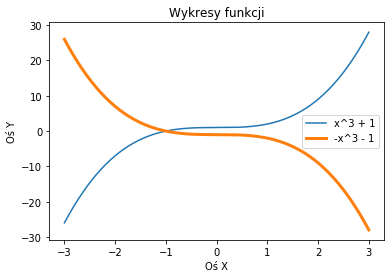

In [2]:
x = np.linspace(-3, 3, 200)
y1 = np.power(x, 3) + 1
plt.plot(x, y1, label = "x^3 + 1")

y2 = -np.power(x, 3) - 1
plt.plot(x, y2, linewidth = 3, label = "-x^3 - 1")

plt.title("Wykresy funkcji")
plt.ylabel("Oś Y")
plt.xlabel("Oś X")
plt.legend()
plt.show()

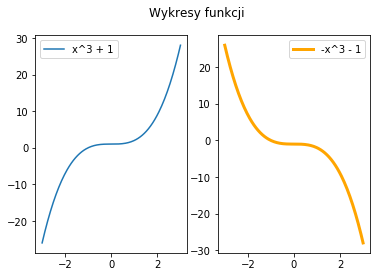

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y1, label = "x^3 + 1")
ax1.legend()

ax2.plot(x, y2, linewidth = 3, label = "-x^3 - 1", color = "orange")
ax2.legend()

fig.suptitle("Wykresy funkcji")
plt.show()

# Zadanie 2

a) Narysować wykres słupkowy na podanych danych.

b) Znaleźć sposób (w internecie) na narysowanie wykresu kołowego na podanych danych.
 

In [4]:
labels = ['Blue', 'Red', 'Green', 'Purple']
sizes = [15, 30, 45, 10]

### barplot

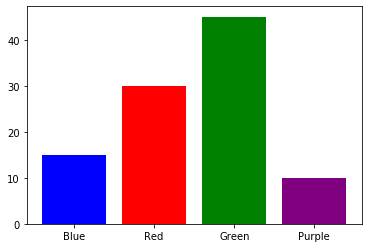

In [5]:
plt.bar(labels, sizes, color = labels) # w tym przypadku użycie kolorów ma sens 
plt.show()

### pie chart (nie dla wrażliwych)

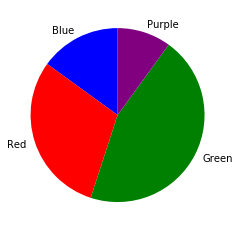

In [6]:
plt.pie(sizes, labels = labels, colors = labels, startangle = 90)
plt.show()

# Zadanie 3

Poprawić wykres tak, aby łatwiej było odczytać w którym województwie śmiertelność wzrosła najbardziej.
Jest przynajmniej kilka innych podejść: scatterplot z latami na osi OX/OY, odcinki zaczynające się w danych ze średniej a kończące w 2020.
Jestem też ciekawa Waszych innych pomysłów.

![https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png](https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png)

Źródło: https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png

In [7]:
wojewodztwo = ["ZACHODNIOPOMORSKIE", "WIELKOPOLSKIE", "WARMINSKO-MAZURSKIE", "SWIETOKRZYSKIE",  "SLASKIE", "POMORSKIE", "PODLASKIE", "PODKARPACKIE", "OPOLSKIE", "MAZOWIECKIE", "MALOPOLSKIE", "LODZKIE", "LUBUSKIE", "LUBELSKIE", "KUJAWSKO-POMORSKIE", "DOLNOSLASKIE"]
l_2020 = [1874, 4013, 1565, 2008, 6270, 2521, 1468, 2909, 1356, 6564, 4743, 3687, 1313, 2731, 2435, 3665]
l_2015_2019 = [1509, 2796, 1241, 1208, 4255, 1830, 1049, 1643, 881, 4811, 2690, 2578, 894, 1920, 1768, 2683]
wojewodztwo = [x.lower() for x in wojewodztwo] #trochę mi nie pasowały wielkie litery do wykresu :D 

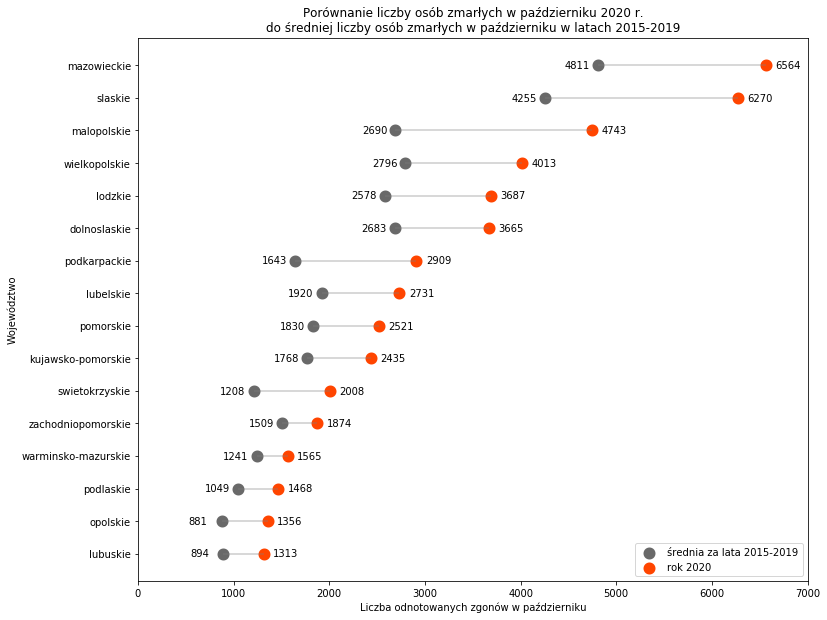

In [8]:
df = pd.DataFrame({'woj': wojewodztwo, 'l2020': l_2020 , 'l2015_2019': l_2015_2019 })
 
sorted_df = df.sort_values(by = 'l2020') #sortuję po największej liczbie zgonów w październiku 2020
my_range=range(1, len(sorted_df.index) + 1)

plt.figure(figsize=(12,10))
plt.hlines(y = my_range, xmin = sorted_df['l2015_2019'], xmax = sorted_df['l2020'], color = 'grey', alpha = 0.4)
plt.scatter(sorted_df['l2015_2019'], my_range, color = 'dimgrey', linewidths = 6, label = 'średnia za lata 2015-2019')
plt.scatter(sorted_df['l2020'], my_range, color = 'orangered', linewidths = 6, label = 'rok 2020')
plt.xlim(0, 7000)
plt.legend(loc = 'lower right')
for i, v in enumerate(sorted_df['l2020']):
    plt.text(v + 100, i + 0.9, str(v))
    
for i, v in enumerate(sorted_df['l2015_2019']):
    plt.text(v - 350, i + 0.9, str(v)) 

plt.yticks(my_range, sorted_df['woj'])
plt.title('Porównanie liczby osób zmarłych w październiku 2020 r.\ndo średniej liczby osób zmarłych w październiku w latach 2015-2019')
plt.xlabel('Liczba odnotowanych zgonów w październiku')
plt.ylabel('Województwo')

plt.show()

# Zadanie 4

Zrobić własny wykres w stylu xkcd dotyczący wizualzacji danych. Może być bardzo luźno związany.

Jeśli ktoś nie trafił na komiksy xkcd, to polecam przejrzeć zajrzeć na stronę Randalla Munroe: https://xkcd.com/

Tu kilka przykładów, które mogą być inspiracją albo chociaż rozrywką:
- https://xkcd.com/688/
- https://xkcd.com/1597/ - True story jak Wam pokazałam gita :(
- https://xkcd.com/1945/

Matplotlib pozwala na proste tworzenie wykresów w stylu xkcd, służy do tego funkcja `xkcd()` z `matplotlib.pyplot`.
Warto zajrzeć do dokumentacji: https://matplotlib.org/gallery/showcase/xkcd.html
Mój przykład umieściłam poniżej.

Uwaga, w szczególności styl działa też z wykresami kołowymi i słupkowymi.

### Przykład

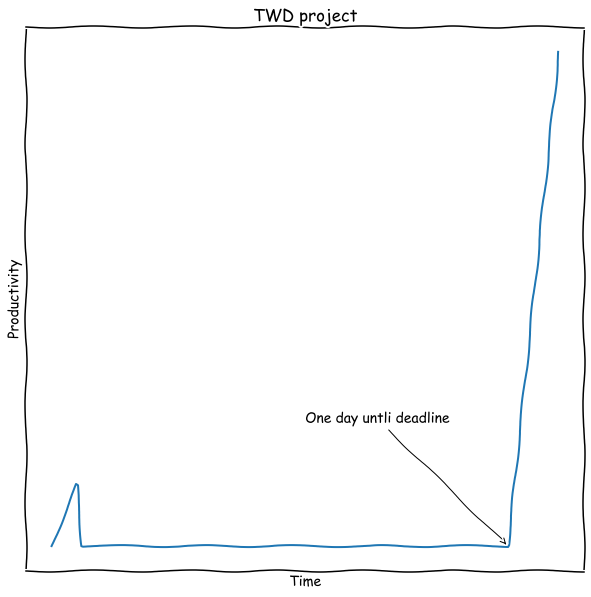

In [9]:
x = [0, 0.05, 0.06, 0.9, 1]
y = [0, 0.5, 0, 0, 4]

# rysowanie w xkcd mode
with plt.xkcd():
    # ustawienie rozmiaru
    plt.figure(figsize=(10,10))
    
    plt.plot(x,y)
    
    # usuniecie podpisow osi
    plt.xticks([])
    plt.yticks([])
    
    # dodanie napisow
    plt.title("TWD project")
    plt.xlabel('Time')
    plt.ylabel('Productivity')

    plt.annotate(
        'One day untli deadline',
        xy=(0.9, 0), arrowprops=dict(arrowstyle='->'), xytext=(0.5, 1))
plt.show()

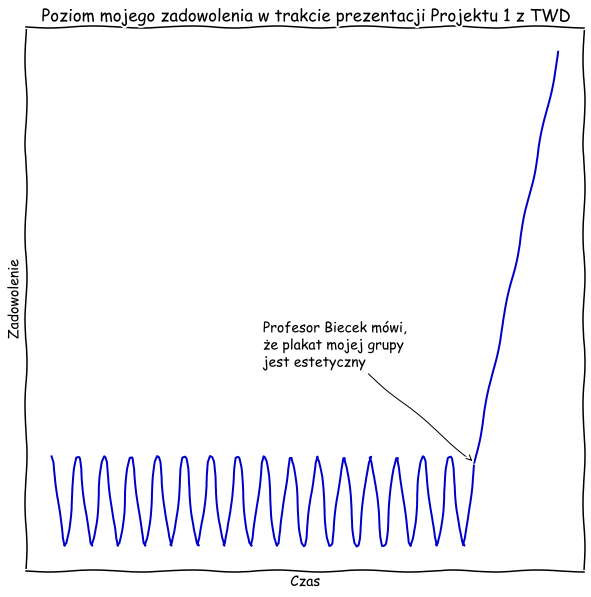

In [11]:
x1 = np.linspace(0, 100, 200)
y1 = np.cos(x1)

# rysowanie w xkcd mode
with plt.xkcd():
    plt.figure(figsize=(10,10))
    
    plt.plot(x1,y1, color = "mediumblue")
    plt.plot([100, 120], [np.cos(100), 10], color = "mediumblue")
    
    # usuniecie podpisow osi
    plt.xticks([])
    plt.yticks([])
    
    # dodanie napisow
    plt.title("Poziom mojego zadowolenia w trakcie prezentacji Projektu 1 z TWD")
    plt.xlabel('Czas')
    plt.ylabel('Zadowolenie')

    plt.annotate(
        'Profesor Biecek mówi,\nże plakat mojej grupy\njest estetyczny',
        xy=(100, np.cos(100)), arrowprops=dict(arrowstyle='->'), xytext=(50, 3))
plt.show()